<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

<img src = https://miro.medium.com/max/720/1*G1Y_-X14q2xMVHlUuaUUdA.png />

Linear regression is a basic predictive analytics technique that uses historical data to predict an output variable. It is popular for predictive modelling because it is easily understood and can be explained using plain English.

Understanding how to implement linear regression models can unearth stories in data to solve important problems.

The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:

P = 90*S

With this model, we can then predict the cost of any house. If we have a house that is 1,500 square feet, we can calculate its price to be:

P = 90*1500 = $135,000

## Basic concepts and mathematics
There are two kinds of variables in a linear regression model:

- The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
- The output variable is the variable that we want to predict. It is commonly referred to as Y.
To estimate Y using linear regression, we assume the equation:

      Yₑ = α + β X

where Yₑ is the estimated or predicted value of Y based on our linear equation.

Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ.

If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X.

So, how do we estimate α and β? We can use a method called ordinary least squares.

## Ordinary Least Squares

<img width = 400 src = https://miro.medium.com/max/882/1*2VBMHbTdBI4cNozHhpTa0Q.png />


The objective of the least squares method is to find values of α and β that minimise the sum of the squared difference between Y and Yₑ. We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:

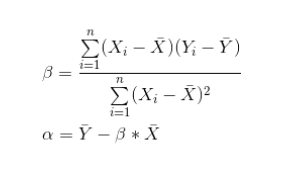

where X̄ is the mean of X values and Ȳ is the mean of Y values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset - https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [ ]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We will only be looking at the TV variable in this example — we will explore whether TV advertising spending can predict the number of sales for the product.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
y = df["Sales"]

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X,y)


In [ ]:
model.score(X,y)

0.611875050850071

In [ ]:
model.intercept_

7.032593549127695

In [ ]:
model.coef_

array([0.04753664])

In [ ]:
model.predict([[14]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.69810652])

In [ ]:
y = 7.032593549127695 + 0.04753664 * 100
y

11.786257549127694

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 9.311638095158283
betas = [0.20249578]


- Thus, the equation for the model will be: Sales = 7.032 + 0.047*TV

- In plain English, this means that, on average, if we spent $100 on TV advertising, we should expect to sell 11.73 units.

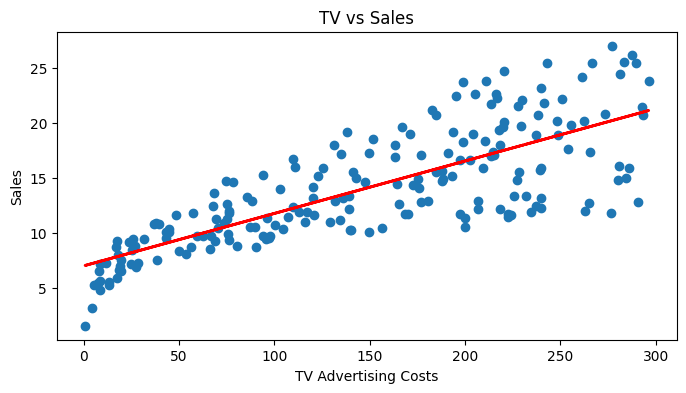

In [ ]:
# Predict values
sales_pred = model.predict(X)

# Plot regression against actual data
plt.figure(figsize=(8, 4))
plt.plot(df['TV'], df['Sales'], 'o')           # scatter plot showing actual data
plt.plot(df['TV'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('TV Advertising Costs')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

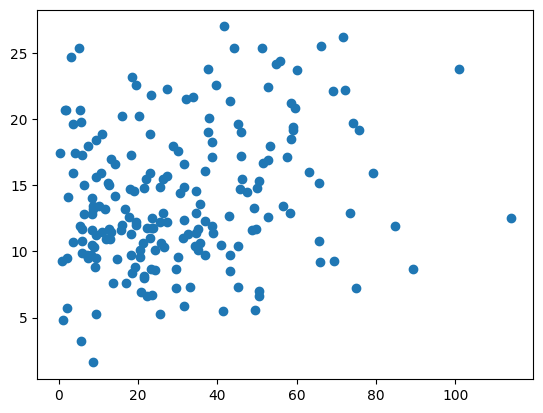

In [ ]:
plt.scatter(df["Newspaper"], df["Sales"])

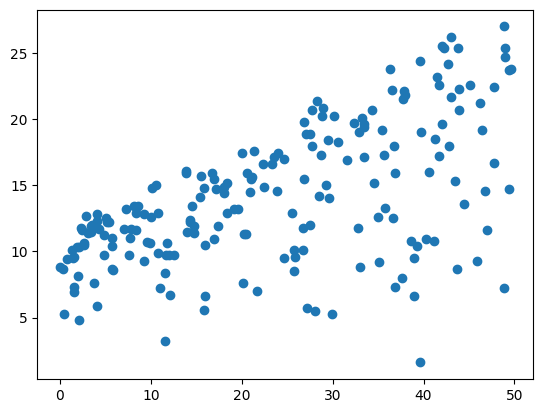

In [ ]:
plt.scatter(df["Radio"], df["Sales"])

In [ ]:
model.predict([[800]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([45.0619059])

## Multiple Linear Regression

Yₑ = α + β₁X₁ + β₂X₂ + … + βₚXₚ, where p is the number of predictors.

In our example, we will be predicting Sales using the variables TV and Radio i.e. our model can be written as:

Sales = α + β₁*TV + β₂*Radio.

In [ ]:
X = df[["TV","Radio"]]
y = df["Sales"]
model_mlr = LinearRegression().fit(X,y)

In [ ]:
print(f'alpha = {model_mlr.intercept_}')
print(f'betas = {model_mlr.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


Therefore, our model can be written as:

    Sales = 2.921 + 0.046*TV + 0.1880*Radio.

In [ ]:
model_mlr.score(X,y)

0.8971942610828957

In [ ]:
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [ ]:
model_mlr.predict(X)

Now that we’ve fit a multiple linear regression model to our data, we can predict sales from any combination of TV and Radio advertising costs! For example, if we wanted to know how many sales we would make if we invested 300 in TV advertising and $200 in Radio advertising…all we have to do is plug in the values!

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
new_X = [[300, 200]]
print(model_mlr.predict(new_X))

[54.24638977]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This means that if we spend 300 on TV advertising and $200 on Radio advertising, we should expect to see, on average, 54 units sold.

In [ ]:
model_mlr.score(X,y)

0.8971942610828957

In [ ]:
X.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [ ]:
X.iloc[:,0]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

mesh_size = .02
margin = 0

# Create a mesh grid on which we will run our model
x_min, x_max = X.iloc[:,0].min() - margin, X.iloc[:,0].max() + margin
y_min, y_max = X.iloc[:,1].min() - margin, X.iloc[:,1].max() + margin
x_range = np.arange(x_min, x_max, mesh_size)
y_range = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(x_range, y_range)


# Run model
pred = model_mlr.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='TV', y='Radio', z='Sales')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=x_range, y=y_range, z=pred, name='pred_surface'))
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Equation: y = 2.92 + 0.05x1 + 0.19x2


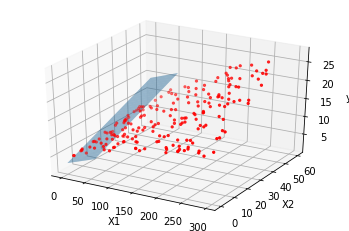

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], y, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")


y_pred = model_mlr.predict(X)

coefs = model_mlr.coef_
intercept = model_mlr.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()




In [ ]:
X = df.drop(columns = ["Sales"])
y = df["Sales"]

In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
model_mlr = LinearRegression().fit(X,y)

In [ ]:
model_mlr.score(X,y)

0.8972106381789522

In [ ]:
print(f'alpha = {model_mlr.intercept_}')
print(f'betas = {model_mlr.coef_}')

alpha = 2.938889369459412
betas = [ 0.04576465  0.18853002 -0.00103749]


In [ ]:
y = 2.93 + 0.045 * TV + 0.188 * Radio + -0.001* Newspaper

In [ ]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Sales ~ TV + Radio + Newspaper', data=df)
model = model.fit()
model.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        15:40:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

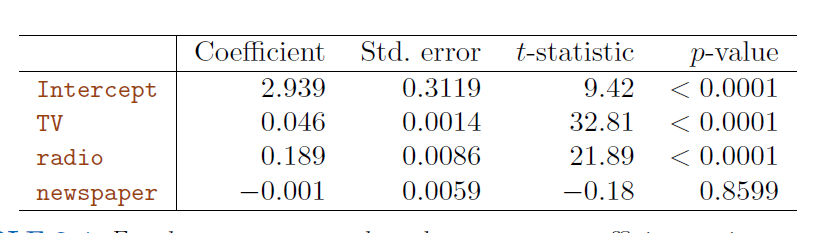

Columns with p value less than 0.05 are important for predicting output column

for more explanation - https://www.youtube.com/watch?v=vemZtEM63GY

The most common hypothesis test involves testing the null 
hypothesis of

    H0 : There is no relationship between X and Y

versus the alternative hypothesis

    Ha : There is some relationship between X and Y

Mathematically, this corresponds to testing

    H0 : β1 = 0

versus

    Ha : β1 ̸= 0,

### There are three classical approaches for selecting important features:
-  Forward selection. We begin with the null model—a model that contains an intercept but no predictors. We then fit p simple linear regressions
and add to the null model the variable that results in the
lowest RSS. We then add to that model the variable that results
in the lowest RSS for the new two-variable model. This approach is
continued until some stopping rule is satisfied.

- Backward selection. We start with all variables in the model, and
remove the variable with the largest p-value—that is, the variable
that is the least statistically significant. The new (p − 1)-variable
model is fit, and the variable with the largest p-value is removed. This
procedure continues until a stopping rule is reached. For instance, we
may stop when all remaining variables have a p-value below some
threshold.

- Mixed selection. This is a combination of forward and backward selection. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. We continue
to add variables one-by-one. Of course, as we noted with the
Advertising example, the p-values for variables can become larger as
new predictors are added to the model. Hence, if at any point the
p-value for one of the variables in the model rises above a certain
threshold, then we remove that variable from the model. We continue
to perform these forward and backward steps until all variables
in the model have a sufficiently low p-value, and all variables outside
the model would have a large p-value if added to the model.